In [1]:
from datasets import load_dataset, load_from_disk
import matplotlib.pyplot as plt
import random

# Load dataset in streaming mode to avoid full download
# dataset = load_dataset("tomg-group-umd/pixelprose", num_proc=8)
dataset = load_from_disk("pixelprose_with_images_20k_p")
print(dataset)


/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['uid', 'url', 'key', 'status', 'original_caption', 'vlm_model', 'vlm_caption', 'toxicity', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit', 'watermark_class_id', 'watermark_class_score', 'aesthetic_score', 'error_message', 'width', 'height', 'original_width', 'original_height', 'exif', 'sha256', 'image_id', 'author', 'subreddit', 'score', 'image'],
    num_rows: 15961
})


In [10]:
import inspect 
inspect.signature(processor.__call__)

<Signature (text: Union[str, List[str]], images: Union[ForwardRef('PIL.Image.Image'), numpy.ndarray, ForwardRef('torch.Tensor'), List[ForwardRef('PIL.Image.Image')], List[numpy.ndarray], List[ForwardRef('torch.Tensor')]] = None, padding: Union[bool, str, transformers.utils.generic.PaddingStrategy] = False, truncation: Union[bool, str, transformers.tokenization_utils_base.TruncationStrategy] = None, max_length=None, return_tensors: Union[str, transformers.utils.generic.TensorType, NoneType] = <TensorType.PYTORCH: 'pt'>) -> transformers.image_processing_base.BatchFeature>

In [14]:
from PIL import Image 
import requests 
from transformers import AutoModelForCausalLM 
from transformers import AutoProcessor 
from tqdm import tqdm

model_id = "microsoft/Phi-3.5-vision-instruct" 
# for best performance, use num_crops=4 for multi-frame, num_crops=16 for single-frame.
processor = AutoProcessor.from_pretrained(model_id, 
  trust_remote_code=True, 
  num_crops=4
) 
lengths = []
maxi = 0 
for i in tqdm(range(3400, 4000), total=600):
    example = dataset[i]['vlm_caption']
    text = f"<|user|>\n<|image_1|>\nDescribe the image.<|end|>\n<|assistant|>\n{example}<|end|><|endoftext|>\n"
    
    inputs = processor(text, [dataset[i]['image']], return_tensors="pt", truncation=True, max_length=1100).to("cuda:0") 
    print(inputs.input_ids.shape)
    if(inputs.input_ids.shape[1] > maxi):
        maxi = inputs.input_ids.shape[1]
    lengths.append(maxi)

  1%|          | 6/600 [00:00<00:12, 48.88it/s]

torch.Size([1, 886])
torch.Size([1, 913])
torch.Size([1, 916])
torch.Size([1, 918])
torch.Size([1, 823])
torch.Size([1, 846])
torch.Size([1, 929])
torch.Size([1, 917])
torch.Size([1, 832])
torch.Size([1, 899])


  3%|▎         | 16/600 [00:00<00:12, 46.23it/s]

torch.Size([1, 874])
torch.Size([1, 921])
torch.Size([1, 883])
torch.Size([1, 979])
torch.Size([1, 1021])
torch.Size([1, 859])
torch.Size([1, 991])
torch.Size([1, 887])
torch.Size([1, 820])
torch.Size([1, 825])


  4%|▍         | 27/600 [00:00<00:13, 42.45it/s]

torch.Size([1, 880])
torch.Size([1, 913])
torch.Size([1, 856])
torch.Size([1, 872])
torch.Size([1, 884])
torch.Size([1, 895])
torch.Size([1, 877])
torch.Size([1, 910])
torch.Size([1, 971])


  6%|▌         | 37/600 [00:00<00:13, 43.01it/s]

torch.Size([1, 942])
torch.Size([1, 859])
torch.Size([1, 1036])
torch.Size([1, 854])
torch.Size([1, 866])
torch.Size([1, 811])
torch.Size([1, 856])
torch.Size([1, 900])


  7%|▋         | 42/600 [00:00<00:14, 38.79it/s]

torch.Size([1, 883])
torch.Size([1, 848])
torch.Size([1, 896])
torch.Size([1, 952])
torch.Size([1, 826])
torch.Size([1, 801])
torch.Size([1, 828])
torch.Size([1, 874])
torch.Size([1, 864])


  8%|▊         | 51/600 [00:01<00:14, 38.25it/s]

torch.Size([1, 838])
torch.Size([1, 856])
torch.Size([1, 836])
torch.Size([1, 867])
torch.Size([1, 867])
torch.Size([1, 884])
torch.Size([1, 827])
torch.Size([1, 918])
torch.Size([1, 921])
torch.Size([1, 875])


 10%|█         | 62/600 [00:01<00:12, 43.34it/s]

torch.Size([1, 843])
torch.Size([1, 884])
torch.Size([1, 971])
torch.Size([1, 914])
torch.Size([1, 858])
torch.Size([1, 892])
torch.Size([1, 834])
torch.Size([1, 837])
torch.Size([1, 856])
torch.Size([1, 894])


 12%|█▏        | 73/600 [00:01<00:10, 48.55it/s]

torch.Size([1, 919])
torch.Size([1, 858])
torch.Size([1, 842])
torch.Size([1, 861])
torch.Size([1, 860])
torch.Size([1, 874])
torch.Size([1, 870])
torch.Size([1, 862])


 13%|█▎        | 78/600 [00:01<00:14, 36.17it/s]

torch.Size([1, 856])
torch.Size([1, 863])
torch.Size([1, 881])
torch.Size([1, 892])
torch.Size([1, 910])
torch.Size([1, 888])
torch.Size([1, 850])
torch.Size([1, 940])


 14%|█▍        | 83/600 [00:02<00:21, 23.97it/s]

torch.Size([1, 955])
torch.Size([1, 924])


 15%|█▌        | 90/600 [00:02<00:26, 19.17it/s]

torch.Size([1, 1011])
torch.Size([1, 1026])
torch.Size([1, 851])
torch.Size([1, 895])
torch.Size([1, 867])
torch.Size([1, 875])


 16%|█▌        | 97/600 [00:02<00:21, 23.56it/s]

torch.Size([1, 989])
torch.Size([1, 1013])
torch.Size([1, 953])
torch.Size([1, 846])
torch.Size([1, 855])
torch.Size([1, 846])
torch.Size([1, 878])
torch.Size([1, 858])


 17%|█▋        | 101/600 [00:03<00:19, 25.69it/s]

torch.Size([1, 839])
torch.Size([1, 832])
torch.Size([1, 960])
torch.Size([1, 980])
torch.Size([1, 878])
torch.Size([1, 956])


 18%|█▊        | 108/600 [00:03<00:22, 22.07it/s]

torch.Size([1, 908])
torch.Size([1, 1099])
torch.Size([1, 873])
torch.Size([1, 869])
torch.Size([1, 847])
torch.Size([1, 873])
torch.Size([1, 867])


 19%|█▉        | 113/600 [00:03<00:17, 27.21it/s]

torch.Size([1, 888])
torch.Size([1, 898])
torch.Size([1, 881])
torch.Size([1, 957])


 20%|██        | 120/600 [00:04<00:23, 20.42it/s]

torch.Size([1, 1081])
torch.Size([1, 1065])
torch.Size([1, 868])
torch.Size([1, 839])
torch.Size([1, 848])


 21%|██        | 124/600 [00:04<00:20, 23.72it/s]

torch.Size([1, 817])
torch.Size([1, 878])
torch.Size([1, 854])
torch.Size([1, 867])
torch.Size([1, 876])
torch.Size([1, 916])
torch.Size([1, 836])
torch.Size([1, 960])
torch.Size([1, 908])


 22%|██▏       | 130/600 [00:04<00:16, 29.22it/s]

torch.Size([1, 916])
torch.Size([1, 953])


 22%|██▏       | 134/600 [00:04<00:23, 20.10it/s]

torch.Size([1, 945])
torch.Size([1, 920])
torch.Size([1, 891])
torch.Size([1, 858])
torch.Size([1, 1031])
torch.Size([1, 907])


 24%|██▍       | 145/600 [00:04<00:14, 31.50it/s]

torch.Size([1, 849])
torch.Size([1, 977])
torch.Size([1, 832])
torch.Size([1, 959])
torch.Size([1, 895])
torch.Size([1, 825])
torch.Size([1, 905])
torch.Size([1, 969])


 25%|██▌       | 150/600 [00:05<00:15, 28.30it/s]

torch.Size([1, 911])
torch.Size([1, 941])
torch.Size([1, 1003])
torch.Size([1, 852])
torch.Size([1, 840])
torch.Size([1, 876])
torch.Size([1, 860])
torch.Size([1, 894])
torch.Size([1, 861])
torch.Size([1, 881])


 26%|██▌       | 156/600 [00:05<00:13, 33.71it/s]

torch.Size([1, 904])
torch.Size([1, 929])
torch.Size([1, 928])
torch.Size([1, 945])
torch.Size([1, 997])


 28%|██▊       | 166/600 [00:05<00:13, 31.23it/s]

torch.Size([1, 927])
torch.Size([1, 909])
torch.Size([1, 897])
torch.Size([1, 855])
torch.Size([1, 893])
torch.Size([1, 893])
torch.Size([1, 907])


 29%|██▉       | 174/600 [00:05<00:13, 30.98it/s]

torch.Size([1, 849])
torch.Size([1, 826])
torch.Size([1, 855])
torch.Size([1, 874])
torch.Size([1, 881])
torch.Size([1, 834])
torch.Size([1, 898])
torch.Size([1, 867])
torch.Size([1, 842])


 30%|███       | 182/600 [00:06<00:13, 29.89it/s]

torch.Size([1, 866])
torch.Size([1, 895])
torch.Size([1, 836])
torch.Size([1, 866])
torch.Size([1, 962])
torch.Size([1, 863])
torch.Size([1, 996])
torch.Size([1, 875])


 31%|███       | 186/600 [00:06<00:13, 30.55it/s]

torch.Size([1, 944])
torch.Size([1, 914])


 32%|███▏      | 194/600 [00:06<00:16, 24.33it/s]

torch.Size([1, 944])
torch.Size([1, 891])
torch.Size([1, 885])
torch.Size([1, 889])
torch.Size([1, 997])
torch.Size([1, 864])
torch.Size([1, 822])
torch.Size([1, 849])


 33%|███▎      | 200/600 [00:06<00:13, 30.39it/s]

torch.Size([1, 872])
torch.Size([1, 861])
torch.Size([1, 877])
torch.Size([1, 854])
torch.Size([1, 879])
torch.Size([1, 858])
torch.Size([1, 898])
torch.Size([1, 893])


 35%|███▍      | 209/600 [00:07<00:11, 33.66it/s]

torch.Size([1, 891])
torch.Size([1, 882])
torch.Size([1, 937])
torch.Size([1, 877])
torch.Size([1, 955])
torch.Size([1, 911])
torch.Size([1, 889])


 36%|███▋      | 218/600 [00:07<00:10, 36.55it/s]

torch.Size([1, 861])
torch.Size([1, 956])
torch.Size([1, 867])
torch.Size([1, 854])
torch.Size([1, 860])
torch.Size([1, 876])
torch.Size([1, 903])
torch.Size([1, 868])
torch.Size([1, 911])
torch.Size([1, 868])


 38%|███▊      | 229/600 [00:07<00:08, 43.00it/s]

torch.Size([1, 994])
torch.Size([1, 881])
torch.Size([1, 968])
torch.Size([1, 1087])
torch.Size([1, 824])
torch.Size([1, 836])
torch.Size([1, 833])
torch.Size([1, 865])
torch.Size([1, 855])
torch.Size([1, 907])


 39%|███▉      | 234/600 [00:07<00:10, 36.16it/s]

torch.Size([1, 972])
torch.Size([1, 975])
torch.Size([1, 949])
torch.Size([1, 857])
torch.Size([1, 848])
torch.Size([1, 854])


 40%|███▉      | 239/600 [00:07<00:10, 36.03it/s]

torch.Size([1, 841])
torch.Size([1, 846])
torch.Size([1, 819])
torch.Size([1, 867])
torch.Size([1, 883])
torch.Size([1, 933])
torch.Size([1, 858])
torch.Size([1, 919])
torch.Size([1, 907])


 41%|████      | 245/600 [00:07<00:08, 40.77it/s]

torch.Size([1, 878])
torch.Size([1, 924])
torch.Size([1, 932])
torch.Size([1, 956])


 42%|████▎     | 255/600 [00:08<00:10, 32.15it/s]

torch.Size([1, 897])
torch.Size([1, 931])
torch.Size([1, 938])
torch.Size([1, 878])
torch.Size([1, 875])
torch.Size([1, 988])
torch.Size([1, 1044])
torch.Size([1, 968])


 44%|████▍     | 263/600 [00:08<00:10, 31.26it/s]

torch.Size([1, 918])
torch.Size([1, 906])
torch.Size([1, 870])
torch.Size([1, 1014])
torch.Size([1, 808])
torch.Size([1, 876])
torch.Size([1, 881])


 46%|████▌     | 274/600 [00:08<00:08, 39.48it/s]

torch.Size([1, 852])
torch.Size([1, 838])
torch.Size([1, 884])
torch.Size([1, 821])
torch.Size([1, 976])
torch.Size([1, 865])
torch.Size([1, 1021])
torch.Size([1, 874])
torch.Size([1, 848])
torch.Size([1, 903])
torch.Size([1, 837])
torch.Size([1, 843])
torch.Size([1, 872])
torch.Size([1, 937])


 47%|████▋     | 283/600 [00:09<00:11, 27.17it/s]

torch.Size([1, 851])
torch.Size([1, 920])
torch.Size([1, 890])
torch.Size([1, 919])
torch.Size([1, 933])
torch.Size([1, 835])


 48%|████▊     | 290/600 [00:09<00:09, 34.03it/s]

torch.Size([1, 1034])
torch.Size([1, 871])
torch.Size([1, 812])
torch.Size([1, 864])
torch.Size([1, 887])
torch.Size([1, 878])
torch.Size([1, 880])
torch.Size([1, 908])
torch.Size([1, 858])
torch.Size([1, 908])
torch.Size([1, 896])


 50%|█████     | 301/600 [00:09<00:07, 40.48it/s]

torch.Size([1, 896])
torch.Size([1, 842])
torch.Size([1, 938])
torch.Size([1, 883])
torch.Size([1, 985])
torch.Size([1, 852])
torch.Size([1, 1012])
torch.Size([1, 892])
torch.Size([1, 915])


 52%|█████▏    | 311/600 [00:09<00:07, 39.71it/s]

torch.Size([1, 895])
torch.Size([1, 902])
torch.Size([1, 876])
torch.Size([1, 1101])
torch.Size([1, 844])
torch.Size([1, 869])
torch.Size([1, 969])
torch.Size([1, 1786])
torch.Size([1, 864])


 54%|█████▍    | 323/600 [00:10<00:05, 46.20it/s]

torch.Size([1, 897])
torch.Size([1, 853])
torch.Size([1, 870])
torch.Size([1, 859])
torch.Size([1, 852])
torch.Size([1, 848])
torch.Size([1, 806])
torch.Size([1, 867])
torch.Size([1, 852])
torch.Size([1, 883])
torch.Size([1, 871])


 55%|█████▍    | 328/600 [00:10<00:06, 41.01it/s]

torch.Size([1, 947])
torch.Size([1, 903])
torch.Size([1, 896])
torch.Size([1, 941])
torch.Size([1, 835])
torch.Size([1, 1020])


 56%|█████▌    | 333/600 [00:10<00:07, 36.73it/s]

torch.Size([1, 918])
torch.Size([1, 897])
torch.Size([1, 1016])
torch.Size([1, 949])


 56%|█████▌    | 337/600 [00:10<00:14, 18.45it/s]

torch.Size([1, 879])
torch.Size([1, 854])
torch.Size([1, 919])
torch.Size([1, 876])
torch.Size([1, 984])
torch.Size([1, 1042])


 58%|█████▊    | 347/600 [00:11<00:10, 24.97it/s]

torch.Size([1, 858])
torch.Size([1, 852])
torch.Size([1, 879])
torch.Size([1, 882])
torch.Size([1, 885])
torch.Size([1, 875])
torch.Size([1, 904])
torch.Size([1, 867])
torch.Size([1, 894])
torch.Size([1, 870])
torch.Size([1, 886])


 59%|█████▉    | 356/600 [00:11<00:09, 24.59it/s]

torch.Size([1, 878])
torch.Size([1, 964])
torch.Size([1, 848])
torch.Size([1, 961])
torch.Size([1, 968])
torch.Size([1, 1000])
torch.Size([1, 967])


 60%|██████    | 361/600 [00:11<00:08, 28.26it/s]

torch.Size([1, 829])
torch.Size([1, 859])
torch.Size([1, 932])
torch.Size([1, 832])
torch.Size([1, 891])
torch.Size([1, 1131])


 62%|██████▏   | 370/600 [00:12<00:07, 31.34it/s]

torch.Size([1, 1134])
torch.Size([1, 861])
torch.Size([1, 870])
torch.Size([1, 855])
torch.Size([1, 879])
torch.Size([1, 864])
torch.Size([1, 881])
torch.Size([1, 859])
torch.Size([1, 911])
torch.Size([1, 880])


 63%|██████▎   | 376/600 [00:12<00:06, 36.65it/s]

torch.Size([1, 905])
torch.Size([1, 900])
torch.Size([1, 913])
torch.Size([1, 889])
torch.Size([1, 932])
torch.Size([1, 927])
torch.Size([1, 1009])


 64%|██████▍   | 386/600 [00:12<00:06, 33.98it/s]

torch.Size([1, 865])
torch.Size([1, 1004])
torch.Size([1, 1028])
torch.Size([1, 863])
torch.Size([1, 870])
torch.Size([1, 847])
torch.Size([1, 885])
torch.Size([1, 915])


 66%|██████▌   | 395/600 [00:12<00:05, 36.61it/s]

torch.Size([1, 861])
torch.Size([1, 847])
torch.Size([1, 867])
torch.Size([1, 880])
torch.Size([1, 882])
torch.Size([1, 866])
torch.Size([1, 877])
torch.Size([1, 885])
torch.Size([1, 915])


 68%|██████▊   | 405/600 [00:12<00:05, 38.20it/s]

torch.Size([1, 920])
torch.Size([1, 910])
torch.Size([1, 883])
torch.Size([1, 940])
torch.Size([1, 862])
torch.Size([1, 995])
torch.Size([1, 860])
torch.Size([1, 1059])


 68%|██████▊   | 409/600 [00:13<00:05, 36.59it/s]

torch.Size([1, 894])
torch.Size([1, 865])
torch.Size([1, 788])
torch.Size([1, 846])
torch.Size([1, 883])


 70%|██████▉   | 418/600 [00:13<00:05, 30.42it/s]

torch.Size([1, 838])
torch.Size([1, 942])
torch.Size([1, 868])
torch.Size([1, 975])
torch.Size([1, 969])
torch.Size([1, 968])
torch.Size([1, 898])
torch.Size([1, 997])


 70%|███████   | 422/600 [00:13<00:05, 31.97it/s]

torch.Size([1, 853])
torch.Size([1, 841])
torch.Size([1, 860])
torch.Size([1, 817])
torch.Size([1, 852])
torch.Size([1, 839])
torch.Size([1, 821])
torch.Size([1, 884])


 71%|███████   | 427/600 [00:13<00:04, 35.63it/s]

torch.Size([1, 882])
torch.Size([1, 893])
torch.Size([1, 858])


 72%|███████▎  | 435/600 [00:14<00:07, 23.44it/s]

torch.Size([1, 849])
torch.Size([1, 932])
torch.Size([1, 916])
torch.Size([1, 849])
torch.Size([1, 856])
torch.Size([1, 871])
torch.Size([1, 962])


 74%|███████▍  | 443/600 [00:14<00:05, 27.15it/s]

torch.Size([1, 884])
torch.Size([1, 965])
torch.Size([1, 828])
torch.Size([1, 899])
torch.Size([1, 950])
torch.Size([1, 1352])
torch.Size([1, 855])
torch.Size([1, 845])


 74%|███████▍  | 447/600 [00:14<00:05, 29.93it/s]

torch.Size([1, 890])
torch.Size([1, 887])
torch.Size([1, 922])
torch.Size([1, 879])
torch.Size([1, 920])
torch.Size([1, 854])


 76%|███████▌  | 455/600 [00:14<00:04, 31.40it/s]

torch.Size([1, 877])
torch.Size([1, 900])
torch.Size([1, 882])
torch.Size([1, 836])
torch.Size([1, 964])
torch.Size([1, 828])
torch.Size([1, 871])
torch.Size([1, 873])
torch.Size([1, 890])
torch.Size([1, 889])


 78%|███████▊  | 465/600 [00:15<00:03, 35.12it/s]

torch.Size([1, 978])
torch.Size([1, 903])
torch.Size([1, 920])
torch.Size([1, 834])
torch.Size([1, 841])
torch.Size([1, 838])
torch.Size([1, 860])
torch.Size([1, 873])


 79%|███████▉  | 475/600 [00:15<00:03, 35.32it/s]

torch.Size([1, 842])
torch.Size([1, 865])
torch.Size([1, 891])
torch.Size([1, 910])
torch.Size([1, 869])
torch.Size([1, 923])
torch.Size([1, 860])


 80%|███████▉  | 479/600 [00:15<00:03, 31.00it/s]

torch.Size([1, 899])
torch.Size([1, 879])
torch.Size([1, 883])
torch.Size([1, 883])
torch.Size([1, 857])
torch.Size([1, 834])


 81%|████████  | 487/600 [00:15<00:03, 33.11it/s]

torch.Size([1, 1053])
torch.Size([1, 894])
torch.Size([1, 859])
torch.Size([1, 1015])
torch.Size([1, 873])
torch.Size([1, 1311])
torch.Size([1, 836])
torch.Size([1, 850])


 83%|████████▎ | 497/600 [00:15<00:02, 38.37it/s]

torch.Size([1, 900])
torch.Size([1, 903])
torch.Size([1, 917])
torch.Size([1, 944])
torch.Size([1, 1075])
torch.Size([1, 841])
torch.Size([1, 873])
torch.Size([1, 882])
torch.Size([1, 860])


 85%|████████▍ | 509/600 [00:16<00:02, 44.90it/s]

torch.Size([1, 894])
torch.Size([1, 909])
torch.Size([1, 910])
torch.Size([1, 863])
torch.Size([1, 958])
torch.Size([1, 945])
torch.Size([1, 994])
torch.Size([1, 925])
torch.Size([1, 988])
torch.Size([1, 935])
torch.Size([1, 961])


 86%|████████▌ | 514/600 [00:16<00:02, 36.52it/s]

torch.Size([1, 899])
torch.Size([1, 885])
torch.Size([1, 866])
torch.Size([1, 875])
torch.Size([1, 854])


 88%|████████▊ | 526/600 [00:16<00:01, 44.46it/s]

torch.Size([1, 854])
torch.Size([1, 883])
torch.Size([1, 865])
torch.Size([1, 883])
torch.Size([1, 845])
torch.Size([1, 976])
torch.Size([1, 850])
torch.Size([1, 948])
torch.Size([1, 835])
torch.Size([1, 991])
torch.Size([1, 872])
torch.Size([1, 973])


 88%|████████▊ | 531/600 [00:16<00:01, 35.52it/s]

torch.Size([1, 934])
torch.Size([1, 895])
torch.Size([1, 879])
torch.Size([1, 915])
torch.Size([1, 880])


 89%|████████▉ | 536/600 [00:16<00:01, 37.53it/s]

torch.Size([1, 934])
torch.Size([1, 1092])
torch.Size([1, 900])
torch.Size([1, 903])
torch.Size([1, 920])
torch.Size([1, 861])
torch.Size([1, 872])
torch.Size([1, 881])


 91%|█████████ | 545/600 [00:17<00:01, 36.69it/s]

torch.Size([1, 918])
torch.Size([1, 923])
torch.Size([1, 1063])
torch.Size([1, 828])
torch.Size([1, 861])
torch.Size([1, 841])
torch.Size([1, 864])
torch.Size([1, 846])
torch.Size([1, 860])
torch.Size([1, 859])


 93%|█████████▎| 556/600 [00:17<00:01, 35.95it/s]

torch.Size([1, 854])
torch.Size([1, 862])
torch.Size([1, 903])
torch.Size([1, 835])
torch.Size([1, 910])
torch.Size([1, 931])
torch.Size([1, 847])


 93%|█████████▎| 560/600 [00:17<00:01, 36.13it/s]

torch.Size([1, 923])
torch.Size([1, 831])
torch.Size([1, 907])
torch.Size([1, 881])
torch.Size([1, 869])
torch.Size([1, 834])


 94%|█████████▍| 564/600 [00:18<00:02, 13.31it/s]

torch.Size([1, 1209])
torch.Size([1, 881])
torch.Size([1, 854])


 95%|█████████▌| 571/600 [00:18<00:01, 16.67it/s]

torch.Size([1, 1066])
torch.Size([1, 874])
torch.Size([1, 865])
torch.Size([1, 892])
torch.Size([1, 817])
torch.Size([1, 860])
torch.Size([1, 847])
torch.Size([1, 895])
torch.Size([1, 885])


 97%|█████████▋| 582/600 [00:18<00:00, 25.55it/s]

torch.Size([1, 876])
torch.Size([1, 831])
torch.Size([1, 860])
torch.Size([1, 827])
torch.Size([1, 896])
torch.Size([1, 985])
torch.Size([1, 845])
torch.Size([1, 903])


 98%|█████████▊| 587/600 [00:19<00:00, 29.15it/s]

torch.Size([1, 928])
torch.Size([1, 873])
torch.Size([1, 1017])
torch.Size([1, 977])
torch.Size([1, 911])
torch.Size([1, 1085])
torch.Size([1, 879])
torch.Size([1, 920])


 98%|█████████▊| 591/600 [00:19<00:00, 29.30it/s]

torch.Size([1, 825])
torch.Size([1, 917])
torch.Size([1, 904])


100%|██████████| 600/600 [00:19<00:00, 30.48it/s]

torch.Size([1, 969])
torch.Size([1, 834])
torch.Size([1, 829])
torch.Size([1, 857])
torch.Size([1, 872])
torch.Size([1, 871])
torch.Size([1, 869])


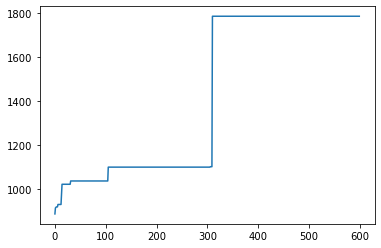

In [15]:
plt.figure()
plt.plot(lengths)

In [16]:
import torch
def is_valid_image(example):
        text = "<|user|>\n<|image_1|>\nDescribe the image."
        processed_image_shape = processor(text, example['image'], return_tensors="pt")['image_sizes']
        print(processed_image_shape)
        return torch.equal(processed_image_shape[0], torch.tensor([672, 672]))
is_valid_image(dataset[0])

tensor([[672, 672]])


False

In [22]:
import multiprocess.context as ctx
ctx._force_start_method('spawn')

def filter_dataset(dataset, processor):
    def is_valid_image(example):
        text = "<|user|>\n<|image_1|>\nDescribe the image."
        processed_image_shape = processor(text, example['image'], return_tensors="pt")['image_sizes']
        return torch.equal(processed_image_shape[0], torch.tensor([672, 672]))
    
    filtered_dataset = dataset.filter(is_valid_image)
    return filtered_dataset

print(f"Original dataset size: {len(dataset)}")
filtered_dataset = filter_dataset(dataset, processor)
print(f"Filtered dataset size: {len(filtered_dataset)}")


Original dataset size: 16221


Filter: 100%|██████████| 16221/16221 [05:35<00:00, 48.29 examples/s]

Filtered dataset size: 15961


In [23]:
filtered_dataset.save_to_disk("pixelprose_with_images_20k_p")

Saving the dataset (31/31 shards): 100%|██████████| 15961/15961 [00:10<00:00, 1501.54 examples/s]


In [7]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values', 'image_sizes'])

In [1]:
print(dataset['train'][0])
from PIL import Image
import requests
from io import BytesIO

url = dataset['train'][4000]['url']
response = requests.get(url, timeout=0.1)
print(response)
img = Image.open(BytesIO(response.content))

plt.imshow(img)



NameError: name 'dataset' is not defined

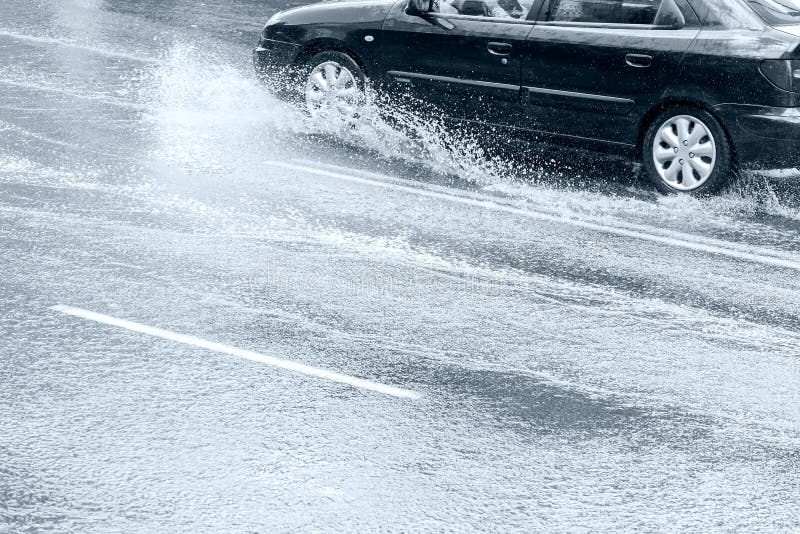

In [35]:
dataset[0]['image']

In [36]:
from PIL import Image 
import requests 
from transformers import AutoModelForCausalLM 
from transformers import AutoProcessor 

model_id = "microsoft/Phi-3.5-vision-instruct" 

# Note: set _attn_implementation='eager' if you don't have flash_attn installed
model = AutoModelForCausalLM.from_pretrained(
  model_id, 
  device_map="cuda", 
  trust_remote_code=True, 
  torch_dtype="auto", 
  _attn_implementation='flash_attention_2',
  cache_dir="./huggingface_cache"  
)

# for best performance, use num_crops=4 for multi-frame, num_crops=16 for single-frame.
processor = AutoProcessor.from_pretrained(model_id, 
  trust_remote_code=True, 
  num_crops=4,
  cache_dir="./huggingface_cache"
) 

images = []
placeholder = ""

# Note: if OOM, you might consider reduce number of frames in this example.
for i in range(1,2):
    url = f"https://image.slidesharecdn.com/azureintroduction-191206101932/75/Introduction-to-Microsoft-Azure-Cloud-{i}-2048.jpg" 
    images.append(sample['image'])
    placeholder += f"<|image_{i}|>\n"

messages = [
    {"role": "user", "content": placeholder+"Summarize the deck of slides."},
]

prompt = processor.tokenizer.apply_chat_template(
  messages, 
  tokenize=False, 
  add_generation_prompt=True
)

inputs = processor(prompt, images, return_tensors="pt").to("cuda:0") 

generation_args = { 
    "max_new_tokens": 1000, 
    "temperature": 0.0, 
    "do_sample": False, 
} 

generate_ids = model.generate(**inputs, 
  eos_token_id=processor.tokenizer.eos_token_id, 
  **generation_args
)

# remove input tokens 
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, 
  skip_special_tokens=True, 
  clean_up_tokenization_spaces=False)[0] 

print(response)


2025-02-02 06:12:13.800001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738476733.808141    9293 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738476733.811840    9293 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-vision-instruct:
- configuration_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-vision-instruct:
- modeling_phi3_v.py
. Make sur

KeyboardInterrupt: 

In [ ]:
from PIL import Image 
import requests 
from transformers import AutoModelForCausalLM 
from transformers import AutoProcessor 

model_id = "microsoft/Phi-3.5-vision-instruct" 

model = AutoModelForCausalLM.from_pretrained(
            model_id, 
            device_map="cuda", 
            trust_remote_code=True, 
            torch_dtype="auto", 
            _attn_implementation='flash_attention_2'    
        )

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
labels = inputs["input_ids"]
assistant_token = processor.tokenizer.convert_tokens_to_ids("<|assistant|>")
assistant_token_index = (labels == assistant_token).nonzero()[0][1]

In [17]:
labels

tensor([[    1, 32010, 29871,    13,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,  

In [13]:
tokenizer = processor.tokenizer
special_tokens = tokenizer.special_tokens_map

# Print each special token and its ID
print("Special Tokens and their IDs:")
for token_name, token_value in special_tokens.items():
    token_id = tokenizer.convert_tokens_to_ids(token_value)
    print(f"{token_name}: {token_value}, ID: {token_id}")

Special Tokens and their IDs:
bos_token: <s>, ID: 1
eos_token: <|endoftext|>, ID: 32000
unk_token: <unk>, ID: 0
pad_token: <|endoftext|>, ID: 32000
additional_special_tokens: ['<|system|>', '<|end|>', '<|user|>', '<|end|>'], ID: [32006, 32007, 32010, 32007]


In [20]:
token_ids = [1, 29871,    13,  3624,   727, 17455, 29973, 32007, 29871,
            13, 32001,  4874, 32007, 29871,    13]
# token_ids = [29871,    13, 11921,   338,   540,  3063, 29973, 32007, 29871,    13, 32007, 1]
tokens = tokenizer.convert_ids_to_tokens(token_ids)

# Print token ID and its associated token string
print("Token ID to Token String Mapping:")
for token_id, token in zip(token_ids, tokens):
    print(f"ID: {token_id}, Token: {token}")

Token ID to Token String Mapping:
ID: 1, Token: <s>
ID: 29871, Token: ▁
ID: 13, Token: <0x0A>
ID: 3624, Token: Is
ID: 727, Token: ▁there
ID: 17455, Token: ▁grass
ID: 29973, Token: ?
ID: 32007, Token: <|end|>
ID: 29871, Token: ▁
ID: 13, Token: <0x0A>
ID: 32001, Token: <|assistant|>
ID: 4874, Token: ▁yes
ID: 32007, Token: <|end|>
ID: 29871, Token: ▁
ID: 13, Token: <0x0A>


In [7]:
inputs = processor([prompt, prompt], [images, images], return_tensors="pt").to("cuda:0") 


ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'list'>.

In [6]:
inputs

{'input_ids': tensor([[    1, 32010, 29871,    13,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
            -1,    -1,    -1,    -1,  

In [34]:
model

Phi3VForCausalLM(
  (model): Phi3VModel(
    (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (vision_embed_tokens): Phi3ImageEmbedding(
      (drop): Dropout(p=0.0, inplace=False)
      (wte): Embedding(32064, 3072, padding_idx=32000)
      (img_processor): CLIPVisionModel(
        (vision_model): CLIPVisionTransformer(
          (embeddings): CLIPVisionEmbeddings(
            (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
            (position_embedding): Embedding(577, 1024)
          )
          (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (encoder): CLIPEncoder(
            (layers): ModuleList(
              (0-23): 24 x CLIPEncoderLayer(
                (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
                (mlp): CLIPMLP(
                  (activation_fn): QuickGELUActivation()
                  (fc1): Linear(i

In [37]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from torchvision import transforms

# Open the image
# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

def process_example(example):
    question = example['question']
    answer = example['answers'][0]['answer']  # Assuming the first answer is the correct one
    image = example['image']

    # Create the text input for the model
    text = f"<|user|>\n<|image_1|>\n{question}<|end|>\n<|assistant|>\n{answer}<|end|>\n"

    # Tokenize the text input
    max_length = 1000
    encodings = tokenizer(text, truncation=True, padding='max_length', max_length=max_length)

    # Load and process the image
    # response = requests.get(image_url)
    # image = image.resize((224, 224))  # Resize the image to the desired size
    # image = torch.tensor(image).permute(2, 0, 1)  # Convert to tensor and rearrange dimensions
    # Create the transform
    
    # Add the image to the encodings dictionary
    encodings['pixel_values'] = tensor
    # print(text)
    encodings['text_read'] = text

    return {key: torch.tensor(val) if key != 'text_read' else val for key, val in encodings.items()  } 

# Process the dataset
# Select a subset of the dataset (e.g., first 100 samples)
subset = dataset['train'].select(range(100))

# Process the subset
processed_subset = subset.map(process_example, remove_columns=subset.column_names)

# Print a sample from the processed dataset

Map:   0%|          | 0/100 [00:00<?, ? examples/s]/tmp/ipykernel_11298/1252734608.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val) if key != 'text_read' else val for key, val in encodings.items()  }
Map: 100%|██████████| 100/100 [00:01<00:00, 93.21 examples/s]


In [38]:
processed_subset[0].keys()


dict_keys(['input_ids', 'attention_mask', 'pixel_values', 'text_read'])

In [39]:
processed_subset[0]['input_ids']

[1,
 32010,
 29871,
 13,
 29966,
 29989,
 3027,
 29918,
 29896,
 29989,
 29958,
 13,
 5618,
 338,
 445,
 15373,
 4586,
 3063,
 1549,
 29973,
 32007,
 29871,
 13,
 32001,
 7787,
 32007,
 29871,
 13,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 3

In [33]:
processed_subset[0]['input_ids']

[1,
 32010,
 29871,
 13,
 29966,
 29989,
 3027,
 29918,
 29896,
 29989,
 29958,
 5618,
 338,
 445,
 15373,
 4586,
 3063,
 1549,
 29973,
 32007,
 32001,
 7787,
 32007,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 32000,
 

In [ ]:
# Create the text input for the model
text = f"<|user|>\n<|image_1|>{question}<|end|><|assistant|>\n{answer}<|end|>"
# Tokenize the text input
max_length = 1000
encodings = self.tokenizer(text, truncation=True, padding='max_length', max_length=max_length)

# Add the image and price information to the encodings dictionary
encodings['pixel_values'] = image

return {key: torch.tensor(val) for key, val in encodings.items()}